# Homework #4 helium burning

This is the first problem for homework #4.

We are given the energy generation rate for helium burning via the 3-alpha reaction, and we want to understand how it behaves.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def q3a(T):
    """this is the triple alpha reaction rate / rho^2 Y^3"""
    T8 = T/1e8
    return 5.09e11 * T8**-3 * np.exp(-44.027/T8)

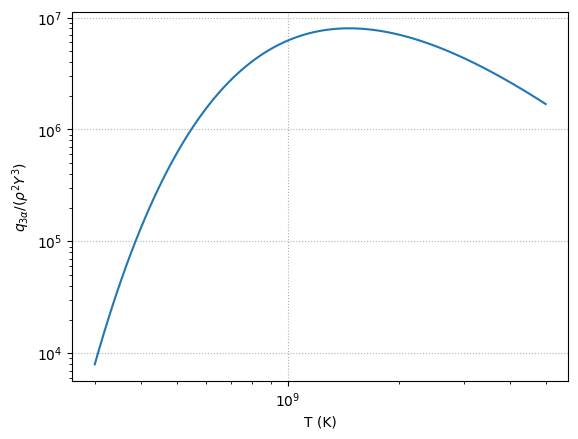

In [3]:
fig, ax = plt.subplots()
T = np.logspace(np.log10(3.e8), np.log10(5.e9), 100)

ax.loglog(T, q3a(T))
ax.set_xlabel("T (K)")
ax.set_ylabel(r"$q_{3\alpha}/(\rho^2 Y^3)$")
ax.grid(ls=":")

Now we want to express this as:

$$q_{3\alpha} = q_0 \rho^2 T^\nu$$

around a temperature $T_0$.

We see that

$$\nu = \left . \frac{d\log q}{d\log T}\right |_{T_0} = \left ( \frac{T}{q} \frac{dq}{dT} \right )_{T_0}$$


Note: we don't need to know $\rho$ and $Y$, because those will cancel out in the definition of $\nu$.  Also note that $\nu$ is dimensionless.

We'll compute this via numerical differencing.  I'll do it for a range of temperatures

In [4]:
print("   T        nu")
for T0 in [1.e8, 2.5e8, 5.e8, 1.e9, 2.5e9, 5e9]:
    dT = 1.e-6 * T0
    nu = (T0/q3a(T0)) * (q3a(T0 + dT) - q3a(T0))/dT
    print(f"{T0:8.5g} : {nu:5.2f}")

   T        nu
   1e+08 : 41.03
 2.5e+08 : 14.61
   5e+08 :  5.81
   1e+09 :  1.40
 2.5e+09 : -1.24
   5e+09 : -2.12


 Notice that the exponent is really high for low temperatures, and it decreases for higher temperatures.  At the temperature I asked for it in the homework, $10^9~\mathrm{K}$, it is 1.4.  But at a temperature of $10^8~\mathrm{K}$, it is 41!